##### Implement model for α-synuclein aggregation by Sneppen et al. presented in the lecture.

    a. Start with the model with 7 parameters and through parameter rescaling arrive to 4-parameter model
    
    b. In the presented version, protease production was assumed constant. How do the results change if you include the fact that protease is induced by
    
        i. Proto-fibrils (s)
        
        ii. Oligomers (ααα)
        
        iii. Fibrils, (F)
        
    c. Which of i-iii have a maximal impact on model outcome?
    
    d. How would you modify the model to include the effect of autophagy? How does this change the results?


In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve_original_model(gamma=1,m=25,sigma=1,nu=1,
                         ic = [0,0,0], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])



In [ ]:
sol_m25 = solve_original_model(m=25,tmax= 250)
sol_m10 = solve_original_model(m=10,tmax=220)


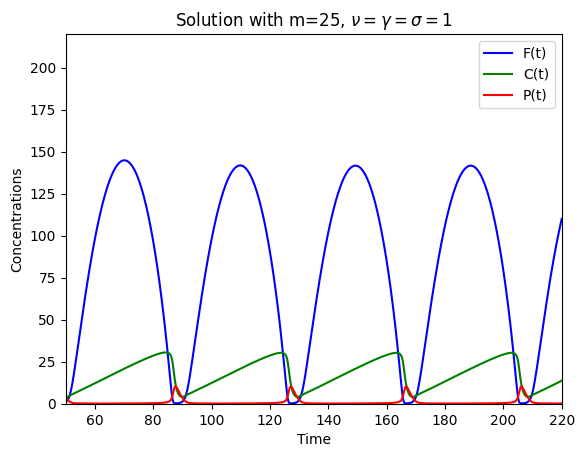

In [ ]:

plt.plot(sol_m25[0], sol_m25[1],label="F(t)",color="blue")
plt.plot(sol_m25[0],sol_m25[2],label="C(t)",color="green")
plt.plot(sol_m25[0],sol_m25[3],label="P(t)",color="red")

plt.xlim([50,220])
plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(r"Solution with m=25, $\nu = \gamma = \sigma =1$")
plt.show()



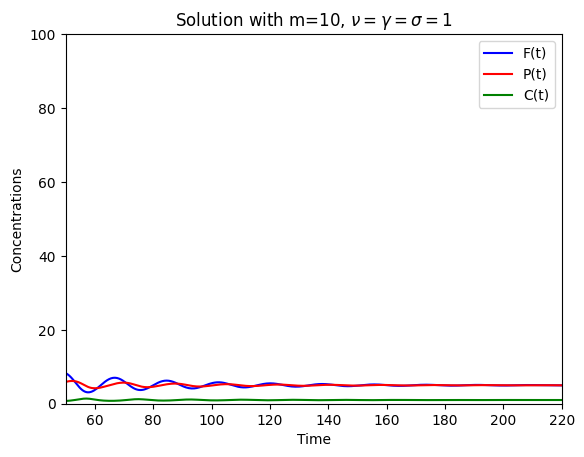

In [ ]:

plt.plot(sol_m10[0], sol_m10[1],label="F(t)",color="blue")
plt.plot(sol_m10[0],sol_m10[2],label="P(t)",color="red")
plt.plot(sol_m10[0],sol_m10[3],label="C(t)",color="green")
plt.xlim([50,220])
plt.ylim([0,100])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(r"Solution with m=10, $\nu = \gamma = \sigma =1$")
plt.show()



In [ ]:
def num_oligomers(sol):
  ts = sol[0]
  Ps = sol[3]

  cumulative_integral = [0] * len(ts)


  for i in range(2, len(ts)):
    area = 0.5 * (1/Ps[i] + 1/Ps[i-1]) * (ts[i] - ts[i-1])
    cumulative_integral[i] = cumulative_integral[i-1] + area


  return([ts,cumulative_integral])


(50.0, 220.0)

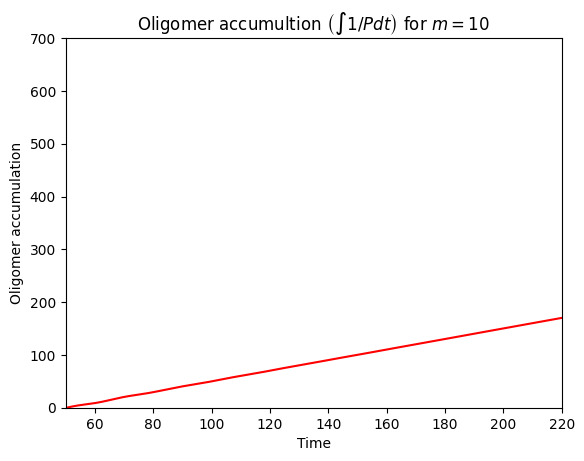

In [ ]:
# oligomers_m25 = num_oligomers(sol_m25)
oligomers_m10 = num_oligomers(sol_m10)

plt.plot(oligomers_m10[0],oligomers_m10[1],color="red")
plt.title(r"Oligomer accumultion $\left(\int 1/P dt\right)$ for $m=10$")
plt.xlabel("Time")
plt.ylabel("Oligomer accumulation")
plt.ylim([0,700])
plt.xlim([50,220])
# plt.plot(oligomers_m10[0],oligomers_m10[1])

In [ ]:
solve_original_model(m=1, sigma=1,tmax=2000,start_from=50)

[array([  50.49203535,   51.65935211,   52.91505153, ..., 1998.0728519 ,
        1999.24531165, 2000.        ]),
 array([0.50033912, 0.50019802, 0.50017659, ..., 0.50033534, 0.5002007 ,
        0.50003559]),
 array([0.49956204, 0.49974488, 0.49977235, ..., 0.4995669 , 0.49974139,
        0.49995525]),
 array([1.00071352, 1.00041571, 1.00037147, ..., 1.00070561, 1.00042142,
        1.00007325])]

In [ ]:
mnum = 35
sigmanum = 35
mat_oligomers = np.zeros((mnum,sigmanum))

for i,m in enumerate(np.logspace(0,2,mnum)):
  print(i)
  for j,sigma in enumerate(np.logspace(-1,1.5,sigmanum)):
    sol = solve_original_model(m=m, sigma=sigma,tmax=1000,start_from=50)
    oligomers = num_oligomers(sol)

    final_oligomer_number = oligomers[-1][-1]

    mat_oligomers[i,j] = final_oligomer_number

    print(m,sigma,final_oligomer_number)




0
1.0 0.1 9497.23837149094
1.0 0.11844845812380056 8021.484175784347
1.0 0.14030037231905737 6772.82796507447
1.0 0.16618362775387496 5719.918675913305
1.0 0.19684194472866123 4827.278163999395
1.0 0.23315624847200295 4073.776007186317
1.0 0.27616998133438475 3440.050476115269
1.0 0.32711908469136664 2904.3435956801495
1.0 0.38746751204561314 2450.472386433967
1.0 0.45894929374867993 2069.556378595097
1.0 0.5436183620153837 1745.6864258858702
1.0 0.6439075678850823 1474.1702801649012
1.0 0.7626985859023444 1242.1469311128121
1.0 0.9034047151333576 1048.9131739112513
1.0 1.070068955693175 885.2087410258573
1.0 1.2674801788800205 747.7423336190142
1.0 1.5013107289081735 631.5121204366185
1.0 1.7782794100389228 533.1107262598389
1.0 2.106344542324121 450.28709037723485
1.0 2.4949326331577466 380.03100385401854
1.0 2.955209235202888 320.8941670323715
1.0 3.5003997734299794 271.12725753267574
1.0 4.146169559796819 228.87169427931437
1.0 4.911073914777701 193.2457600442409
1.0 5.817091329374

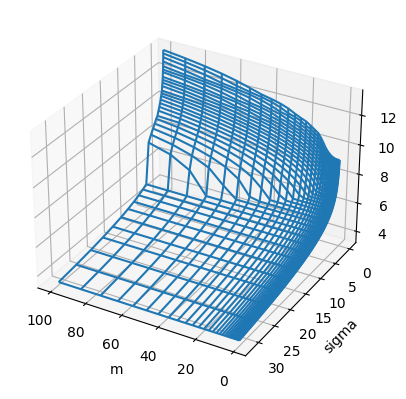

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(111, projection='3d')

ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_zscale("log")

x = np.logspace(0,2,mnum)
y = np.logspace(-1,1.5,sigmanum)

ax.plot_wireframe(x,y, np.log(mat_oligomers.T))


ax.set_xlabel('m')
ax.set_ylabel('sigma')
ax.set_zlabel('ln(oligomers)')
ax.view_init(elev=30, azim=120)

plt.show()

# Protease can be induced by proto fibrils

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta*m/(1+P)

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])


def num_oligomers(sol):
  ts = sol[0]
  Ps = sol[3]

  cumulative_integral = [0] * len(ts)


  for i in range(2, len(ts)):
    area = 0.5 * (1/Ps[i] + 1/Ps[i-1]) * (ts[i] - ts[i-1])
    cumulative_integral[i] = cumulative_integral[i-1] + area


  return([ts,cumulative_integral])


In [ ]:
sol = solve(m=5000,beta=0.4,tmax=5000)


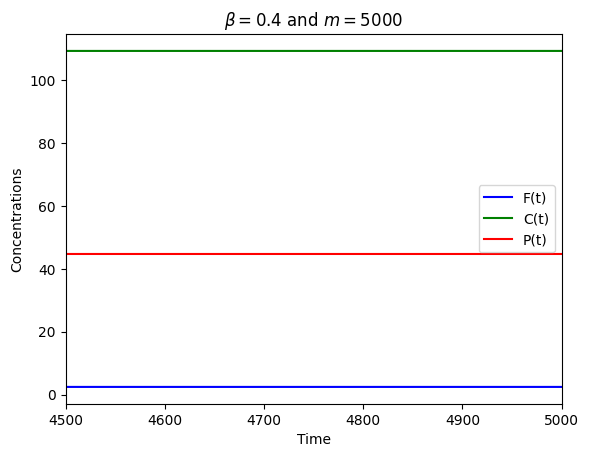

In [ ]:

plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([4500,5000])
# plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(r"$\beta = 0.4$ and $m = 5000$")
plt.show()



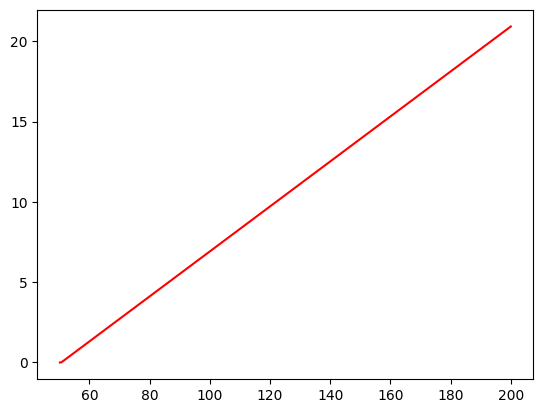

In [ ]:
oligomers = num_oligomers(sol)

plt.plot(oligomers[0],oligomers[1],color="red")


In [ ]:
beta = 5
mnum = 35
sigmanum = 35
mat_oligomers = np.zeros((mnum,sigmanum))

for i,m in enumerate(np.logspace(0,2,mnum)):
  print(i)
  for j,sigma in enumerate(np.logspace(-1,1.5,sigmanum)):
    sol = solve(m=m,beta=beta, sigma=sigma,tmax=1000,start_from=50)
    oligomers = num_oligomers(sol)

    final_oligomer_number = oligomers[-1][-1]

    mat_oligomers[i,j] = final_oligomer_number

    print(m,sigma,final_oligomer_number)




0
1.0 0.1 511.41766281010337
1.0 0.11844845812380056 508.282307598556
1.0 0.14030037231905737 504.6094489466907
1.0 0.16618362775387496 500.3149069386491
1.0 0.19684194472866123 495.30446272587585
1.0 0.23315624847200295 489.47253410520057
1.0 0.27616998133438475 482.7046971936214
1.0 0.32711908469136664 474.82948603786764
1.0 0.38746751204561314 465.9060063600262
1.0 0.45894929374867993 455.5689395363075
1.0 0.5436183620153837 443.7709516259087
1.0 0.6439075678850823 429.95827983023764
1.0 0.7626985859023444 415.05735626377776
1.0 0.9034047151333576 397.93644606713445
1.0 1.070068955693175 379.3205528228079
1.0 1.2674801788800205 359.0752990157088
1.0 1.5013107289081735 337.05017398350293
1.0 1.7782794100389228 313.80658829990904
1.0 2.106344542324121 289.4911600128019
1.0 2.4949326331577466 264.7078347305417
1.0 2.955209235202888 239.32259890734198
1.0 3.5003997734299794 214.5604295293716
1.0 4.146169559796819 190.46533457148684
1.0 4.911073914777701 167.68565500827373
1.0 5.81709132

In [ ]:
np.savetxt('oligomers_a_beta-5.txt', mat_oligomers, fmt='%d')
import time
time.sleep(100)

In [ ]:
from google.colab import files

# Download the file
files.download('oligomers_a_beta-5.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

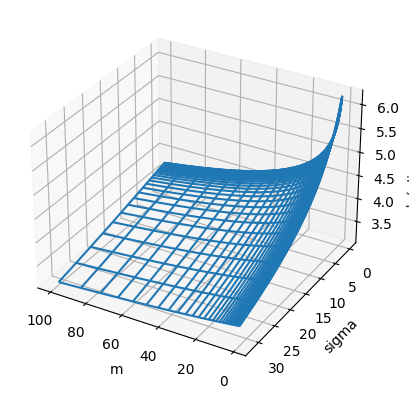

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


x = np.logspace(0,2,mnum)
y = np.logspace(-1,1.5,sigmanum)
X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y


ax.plot_wireframe(X,Y , np.log(mat_oligomers.T))


ax.set_xlabel('m')
ax.set_ylabel('sigma')
ax.set_zlabel('ln(oligomers)')
ax.view_init(elev=30, azim=120)

plt.show()

# Protease induced by oligomers (1/P)




In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0.1], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta/P

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])


def num_oligomers(sol):
  ts = sol[0]
  Ps = sol[3]

  cumulative_integral = [0] * len(ts)


  for i in range(2, len(ts)):
    area = 0.5 * (1/Ps[i] + 1/Ps[i-1]) * (ts[i] - ts[i-1])
    cumulative_integral[i] = cumulative_integral[i-1] + area


  return([ts,cumulative_integral])


In [ ]:
sol = solve(m=200,beta=20)


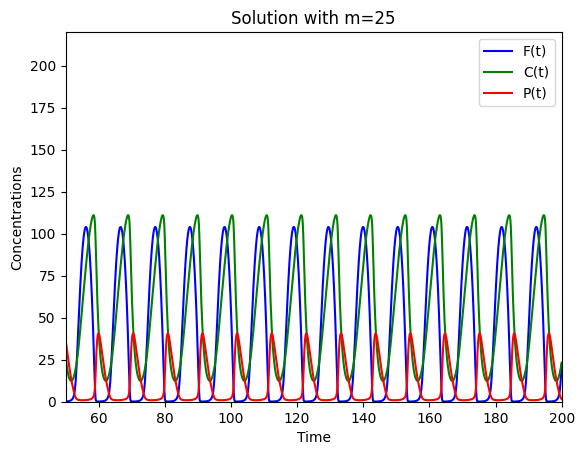

In [ ]:


plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([50,200])
plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title("Solution with m=25")
plt.show()



20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

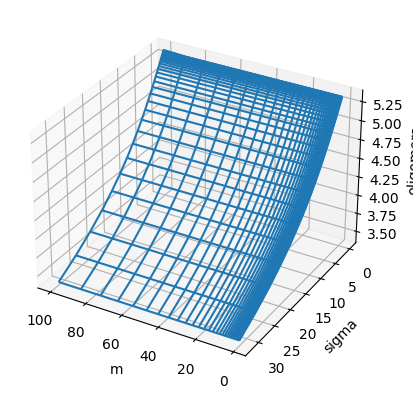

10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

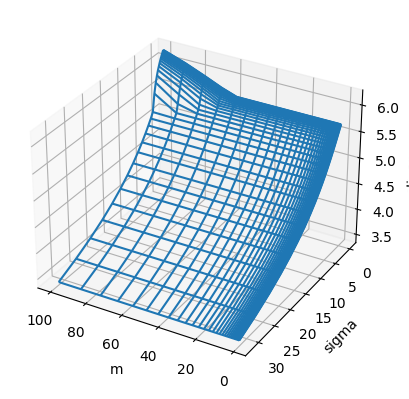

5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

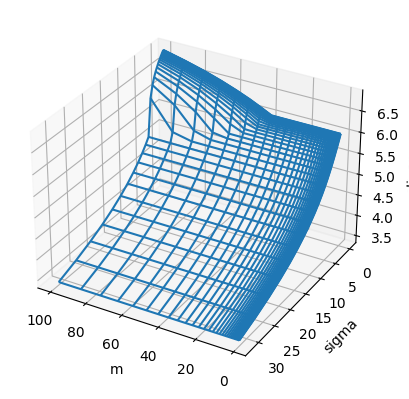

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

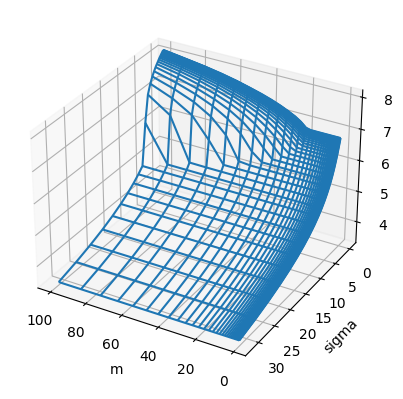

0.5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

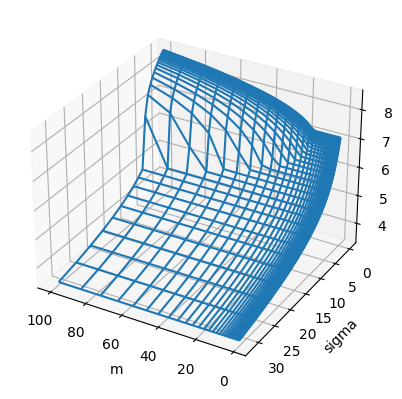

0.1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

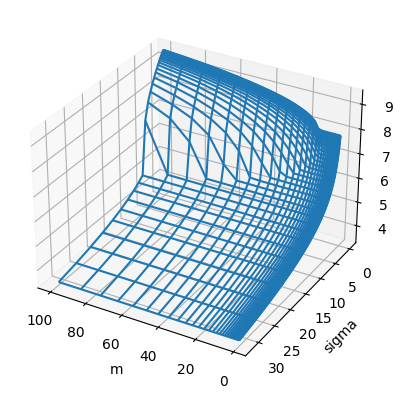

0.05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

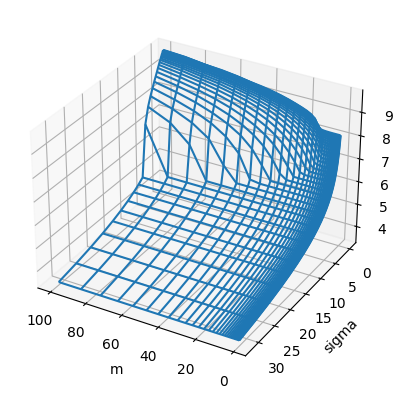

0.01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

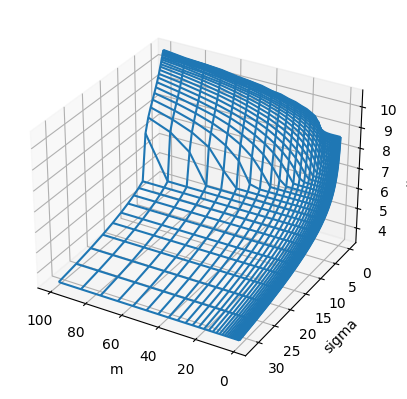

In [ ]:
import time
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D



for beta in [20,10,5,1,0.5,0.1,0.05,0.01]:
  mnum = 35
  sigmanum = 35
  mat_oligomers = np.zeros((mnum,sigmanum))
  print(beta)
  for i,m in enumerate(np.logspace(0,2,mnum)):
    print(i)
    for j,sigma in enumerate(np.logspace(-1,1.5,sigmanum)):
      sol = solve(m=m,beta=beta, sigma=sigma,tmax=1000,start_from=50)
      oligomers = num_oligomers(sol)

      final_oligomer_number = oligomers[-1][-1]

      mat_oligomers[i,j] = final_oligomer_number

  np.savetxt('oligomers_b_beta-' + str(beta) + '.txt', mat_oligomers, fmt='%d')
  time.sleep(20)
  files.download('oligomers_b_beta-' + str(beta) + '.txt')



  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')


  x = np.logspace(0,2,mnum)
  y = np.logspace(-1,1.5,sigmanum)
  X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y


  ax.plot_wireframe(X,Y , np.log(mat_oligomers.T))


  ax.set_xlabel('m')
  ax.set_ylabel('sigma')
  ax.set_zlabel('oligomers')
  ax.view_init(elev=30, azim=120)

  plt.show()



# Protease induced by Fibrils F




In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0.1], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta*F

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])


def num_oligomers(sol):
  ts = sol[0]
  Ps = sol[3]

  cumulative_integral = [0] * len(ts)


  for i in range(2, len(ts)):
    area = 0.5 * (1/Ps[i] + 1/Ps[i-1]) * (ts[i] - ts[i-1])
    cumulative_integral[i] = cumulative_integral[i-1] + area


  return([ts,cumulative_integral])


In [ ]:
sol = solve(m=5000000,beta=100)


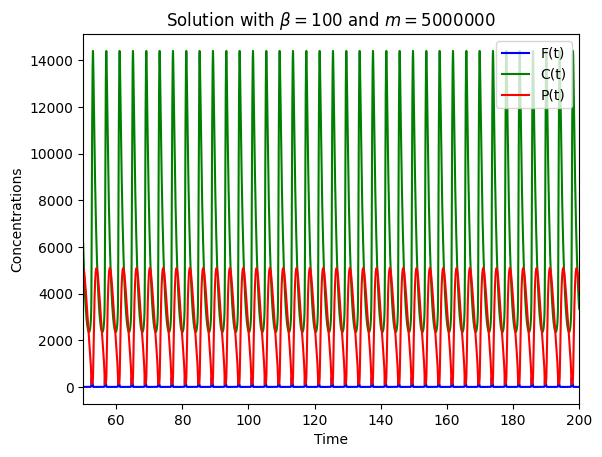

In [ ]:

plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([50,200])
# plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(r"Solution with $\beta = 100$ and $m=5000000$")
plt.show()



0.005
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

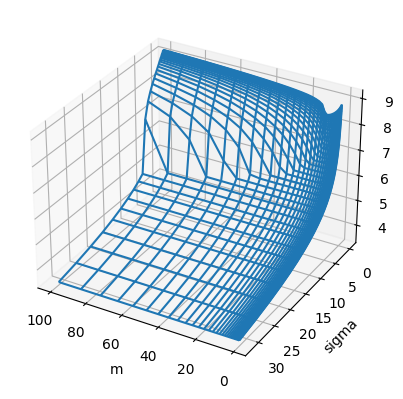

In [ ]:
import time
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D



for beta in [0.005]:
  mnum = 35
  sigmanum = 35
  mat_oligomers = np.zeros((mnum,sigmanum))
  print(beta)
  for i,m in enumerate(np.logspace(0,2,mnum)):
    print(i)
    for j,sigma in enumerate(np.logspace(-1,1.5,sigmanum)):
      sol = solve(m=m,beta=beta, sigma=sigma,tmax=1000,start_from=50)
      oligomers = num_oligomers(sol)

      final_oligomer_number = oligomers[-1][-1]

      mat_oligomers[i,j] = final_oligomer_number

  np.savetxt('oligomers_c_beta-' + str(beta) + '.txt', mat_oligomers, fmt='%d')
  time.sleep(20)
  files.download('oligomers_c_beta-' + str(beta) + '.txt')



  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')


  x = np.logspace(0,2,mnum)
  y = np.logspace(-1,1.5,sigmanum)
  X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y


  ax.plot_wireframe(X,Y , np.log(mat_oligomers.T))


  ax.set_xlabel('m')
  ax.set_ylabel('sigma')
  ax.set_zlabel('oligomers')
  ax.view_init(elev=30, azim=120)

  plt.show()



# Read data and make graphs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Normal model

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve_original_model(gamma=1,m=25,sigma=1,nu=1,
                         ic = [0,0,0], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])



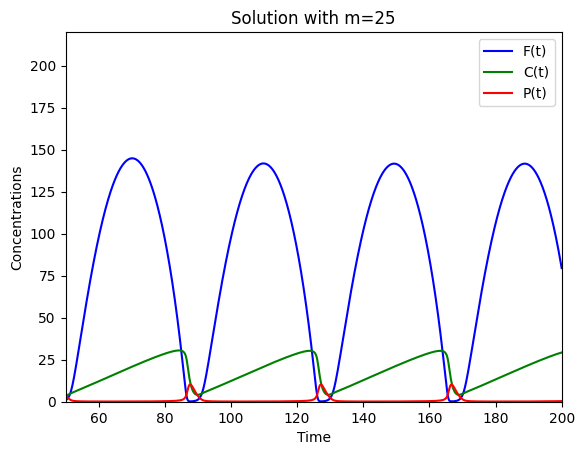

In [ ]:
sol_m25 = solve_original_model(m=25)


plt.plot(sol_m25[0], sol_m25[1],label="F(t)",color="blue")
plt.plot(sol_m25[0],sol_m25[2],label="C(t)",color="green")
plt.plot(sol_m25[0],sol_m25[3],label="P(t)",color="red")

plt.xlim([50,200])
plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title("Solution with m=25")
plt.show()




In [ ]:
from mpl_toolkits.mplot3d import Axes3D
mnum = 35
sigmanum = 35

def plot_matrix(file_path,title="",limi=14):
  mat_oligomers = np.loadtxt(file_path, delimiter=' ')
  fig = plt.figure()
  ax = plt.axes(111, projection='3d')

  x = np.logspace(0,2,mnum)
  y = np.logspace(-1,1.5,sigmanum)

  X, Y = np.meshgrid(x, y)  # Create a meshgrid for X and Y

  ax.plot_wireframe(X,Y,np.log(mat_oligomers.T),color="navy")


  ax.set_xlabel('m')
  ax.set_ylabel(r'$\sigma$')
  ax.set_zlabel('ln (oligomer )')

  ax.view_init(elev=30, azim=100)

  plt.title(title)
  ax.set_zlim([2,limi])

  plt.show()


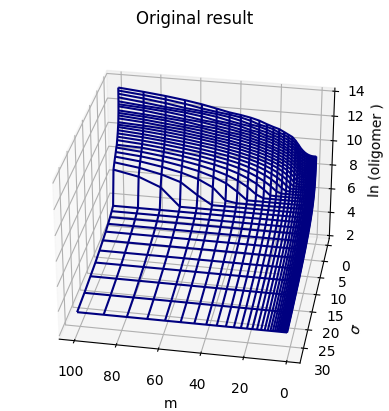

In [ ]:
plot_matrix("/content/drive/MyDrive/Project/oligomers_normal.txt", "Original result")

## Induced by protofibrils


$$
 \dfrac{dP}{dt} = \sigma - P -\gamma F  \cdot P + \nu  C + \beta \dfrac{m}{1+P}  
 $$

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta*m/(1+P)

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])



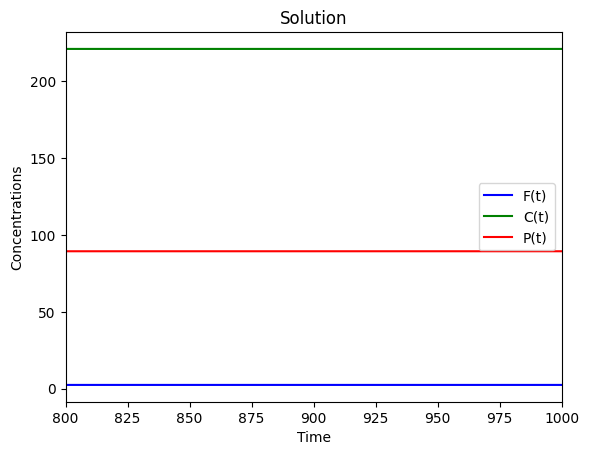

In [14]:
sol = solve(m=20000,beta=0.4,sigma=1,tmax=1000,ic=[2.5,250,90])

plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([800,1000])
# plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title("Solution")
plt.show()



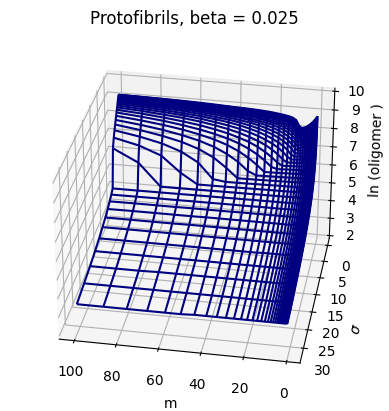

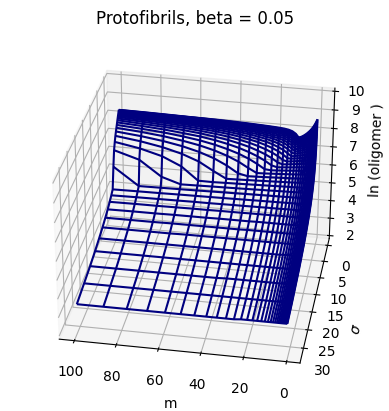

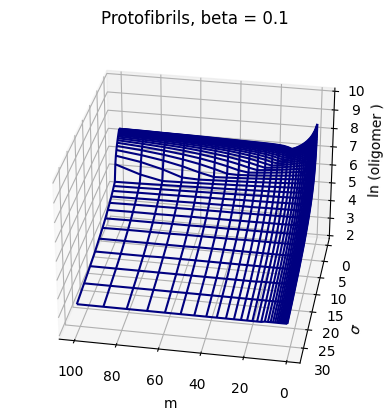

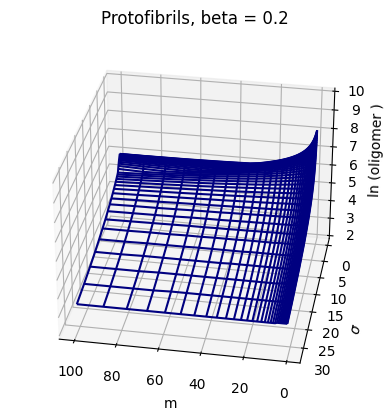

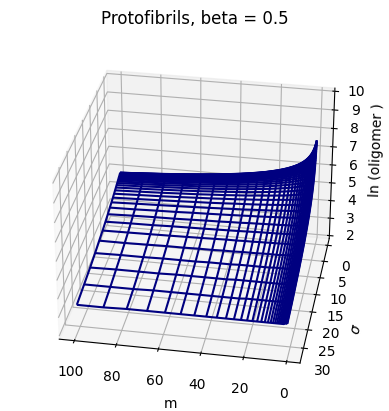

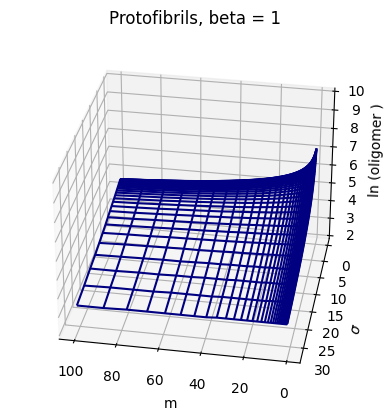

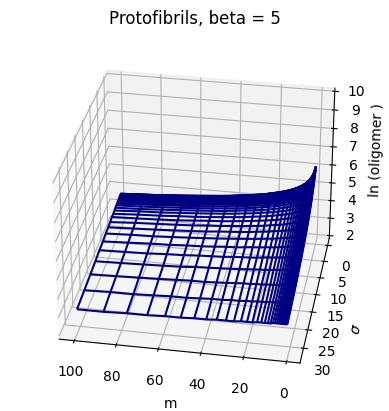

In [ ]:
for beta in ["0.025","0.05","0.1","0.2","0.5","1","5"]:
  plot_matrix("/content/drive/MyDrive/Project/oligomers"+"_a_beta-"+beta+".txt", "Protofibrils, beta = " + beta,limi=10)

## Induced by oligomers

$$
\dfrac{dP}{dt} = \sigma - P - \gamma F \cdot P + \nu  C + \beta \dfrac{1}{P}
$$

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0.1], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta/P

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])



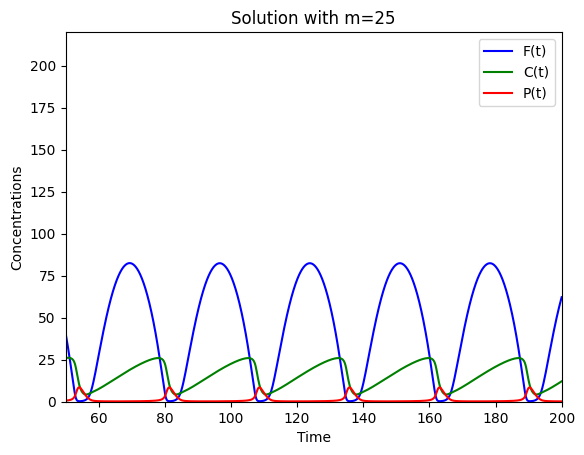

In [ ]:
sol = solve(m=25,beta=0.1)

plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([50,200])
plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title("Solution with m=25")
plt.show()



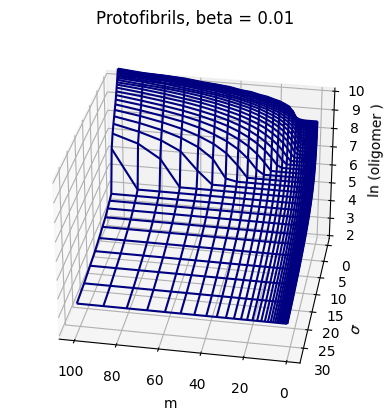

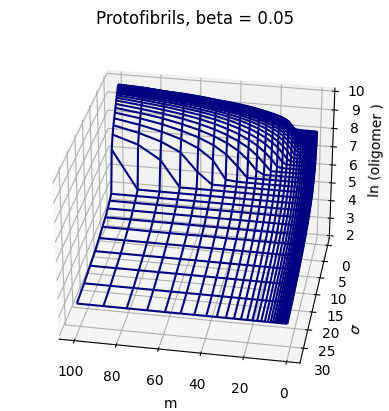

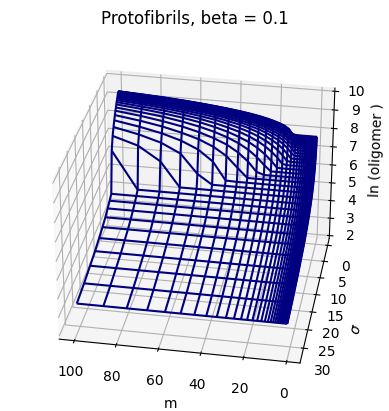

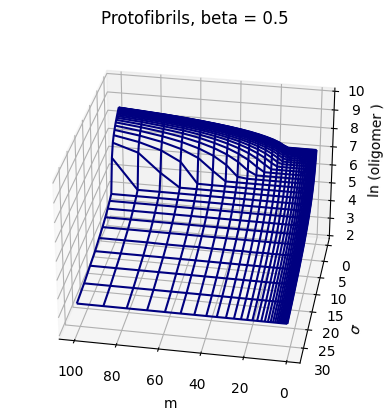

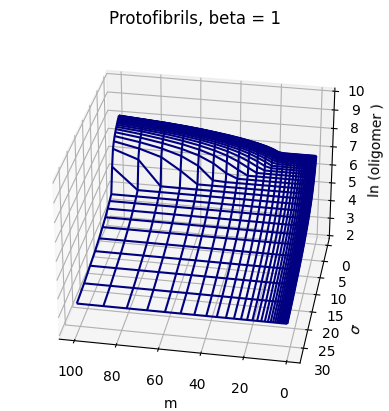

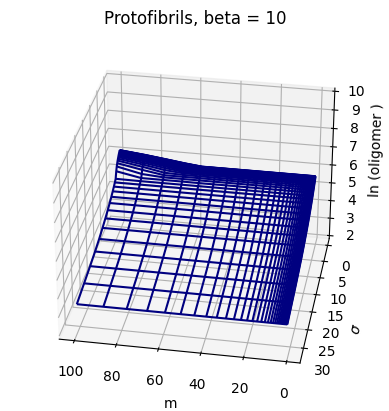

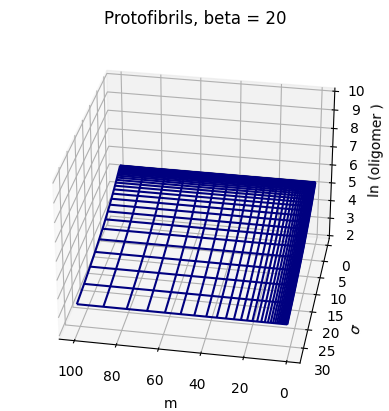

In [ ]:
for beta in ["0.01","0.05","0.1","0.5","1","10","20"]:
  plot_matrix("/content/drive/MyDrive/Project/oligomers"+"_b_beta-"+beta+".txt", "Protofibrils, beta = " + beta,limi=10)

## Induced by Fibrils

$$
\dfrac{dP}{dt} = \sigma - P - \gamma F \cdot P + \nu  C + \beta F
$$

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def solve(gamma=1,m=25,sigma=1,nu=1, beta = 1,
                         ic = [0,0,0], t0 = 0, tmax=200,start_from=50):


  def derivs(t,var):
    dvar = np.zeros(3)
    F,C,P = var
    dvar[0] = m/(1+P) - gamma * F*P
    dvar[1] = gamma*F*P - nu*C
    dvar[2] = sigma - P - gamma*F*P + nu*C + beta*F

    return dvar

  sol = solve_ivp(derivs,[t0,tmax],ic)

  ind = list(sol.t>start_from).index(True)


  return([sol.t[ind:], sol.y[0,:][ind:], sol.y[1,:][ind:], sol.y[2,:][ind:]])



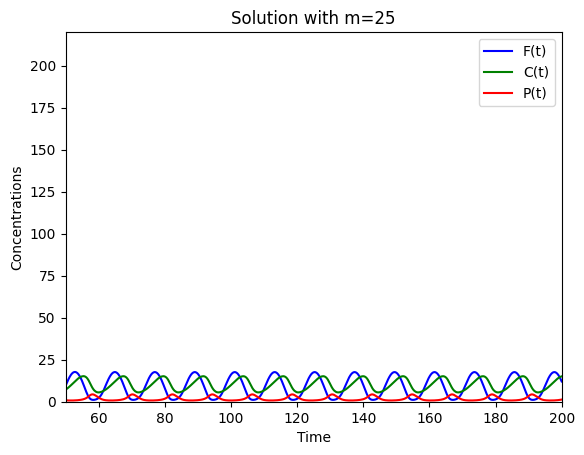

In [ ]:
sol = solve(m=25,beta=0.1)

plt.plot(sol[0], sol[1],label="F(t)",color="blue")
plt.plot(sol[0],sol[2],label="C(t)",color="green")
plt.plot(sol[0],sol[3],label="P(t)",color="red")

plt.xlim([50,200])
plt.ylim([0,220])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title("Solution with m=25")
plt.show()



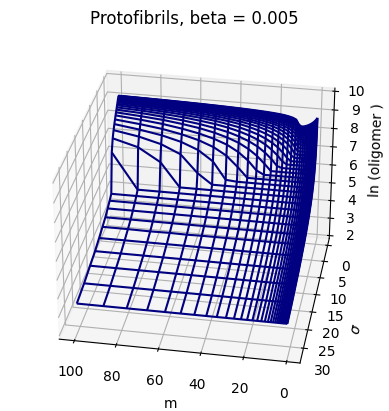

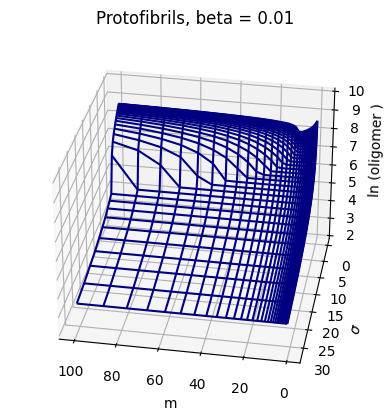

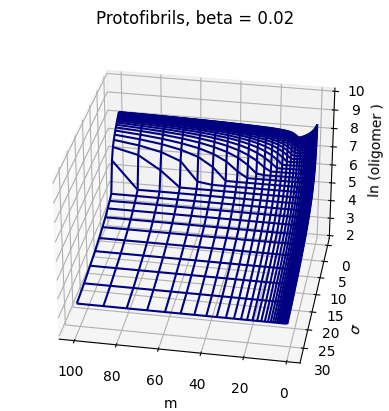

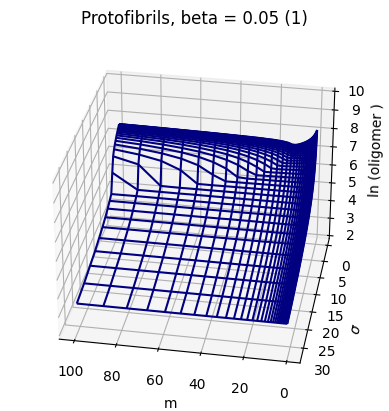

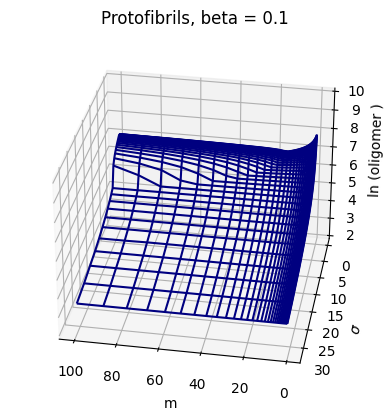

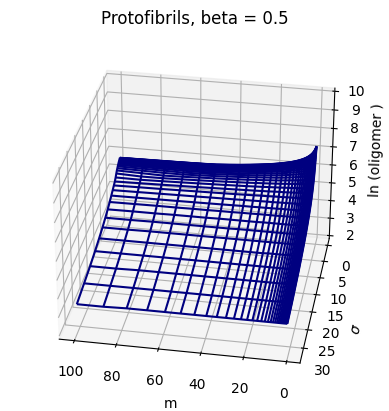

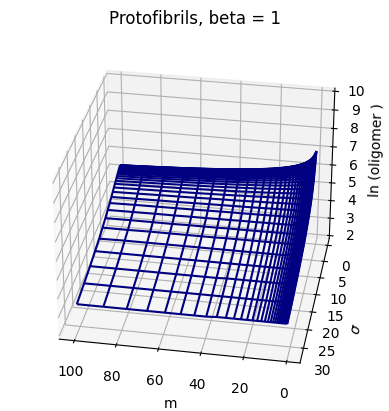

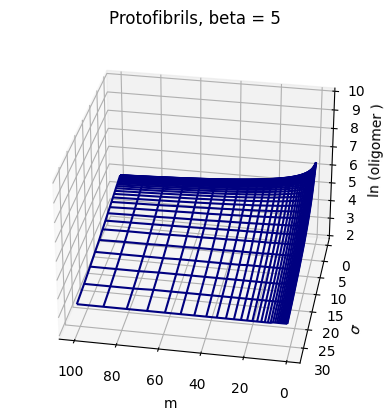

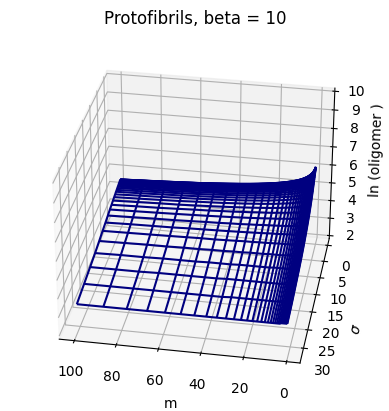

In [ ]:
for beta in ["0.005","0.01","0.02","0.05 (1)","0.1","0.5","1","5","10"]:
  plot_matrix("/content/drive/MyDrive/Project/oligomers"+"_c_beta-"+beta+".txt", "Protofibrils, beta = " + beta,limi=10)